# Imports

In [92]:
import numpy as np
import matplotlib.pyplot as plt

import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'lib')))
from new_numba import *

# RG flow

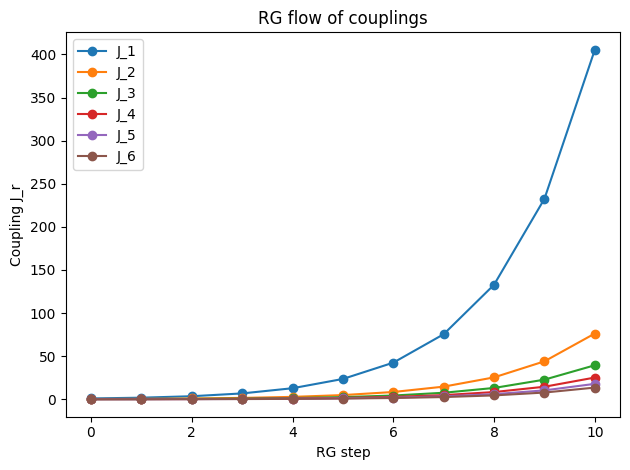


RG step 0:
 [[1.     0.1353]
 [0.1353 1.    ]]

RG step 1:
 [[1.    0.023]
 [0.023 1.   ]]

RG step 2:
 [[1.e+00 8.e-04]
 [8.e-04 1.e+00]]

RG step 3:
 [[1. 0.]
 [0. 1.]]

RG step 4:
 [[1. 0.]
 [0. 1.]]

RG step 5:
 [[1. 0.]
 [0. 1.]]

RG step 6:
 [[1. 0.]
 [0. 1.]]

RG step 7:
 [[1. 0.]
 [0. 1.]]

RG step 8:
 [[1. 0.]
 [0. 1.]]

RG step 9:
 [[1. 0.]
 [0. 1.]]

RG step 10:
 [[1. 0.]
 [0. 1.]]


In [49]:
J0 = 1/1
a = 1.5
max_dist_final = 6
n_steps = 10

J_list, T_list = generate_rg_flow(J0, a, max_dist_final, n_steps, trace_TM=True, TM_r=1)
flows = extract_flows(J_list, max_dist_final)
plot_rg_flow(flows, distances_to_plot=[1, 2, 3, 4, 5, 6, 7, 8])

[print(f"\nRG step {i}:\n", np.round(t, 4)) for i, t in enumerate(T_list)];

# Phase determination

In [11]:
J0 = 1
a = 1.5

phase, step = find_phase(
        J0, a,
        TM_r=1,
        max_dist_final=8,
        n_steps=5,
        threshold=0.1
    )
print(f"Phase at J0={J0}, a={a}: {phase} (decided at step {step})")

Phase at J0=1, a=1.5: ferromagnetic (decided at step 1)


# Critical point

In [3]:
Jc = find_Jc(
    a=1.5,
    Jlow=1e-2, Jhigh=1e2,
    max_steps=6, max_dist_final=5,
    tol=1e-5,
    growth_threshold=1e4, decay_threshold=1e-4
)
print("Critical Jc =", Jc)
print("Critical Tc =", 1/Jc)

Critical Jc = 0.41798577338457105
Critical Tc = 2.3924259237405727


## Critical line

a = 0.7700  →  Jc = 0.001, Tc = 9.97e+02
a = 0.7824  →  Jc = 0.00802, Tc = 1.25e+02
a = 0.7948  →  Jc = 0.0151, Tc = 66.3
a = 0.8073  →  Jc = 0.0221, Tc = 45.2
a = 0.8197  →  Jc = 0.0291, Tc = 34.3
a = 0.8321  →  Jc = 0.0361, Tc = 27.7
a = 0.8445  →  Jc = 0.043, Tc = 23.2
a = 0.8570  →  Jc = 0.0499, Tc = 20.0
a = 0.8694  →  Jc = 0.0568, Tc = 17.6
a = 0.8818  →  Jc = 0.0637, Tc = 15.7
a = 0.8942  →  Jc = 0.0705, Tc = 14.2
a = 0.9067  →  Jc = 0.0773, Tc = 12.9
a = 0.9191  →  Jc = 0.0841, Tc = 11.9
a = 0.9315  →  Jc = 0.0909, Tc = 11.0
a = 0.9439  →  Jc = 0.0976, Tc = 10.2
a = 0.9564  →  Jc = 0.104, Tc = 9.58
a = 0.9688  →  Jc = 0.111, Tc = 9.0
a = 0.9812  →  Jc = 0.118, Tc = 8.49
a = 0.9936  →  Jc = 0.125, Tc = 8.03
a = 1.0061  →  Jc = 0.131, Tc = 7.62
a = 1.0185  →  Jc = 0.138, Tc = 7.25
a = 1.0309  →  Jc = 0.145, Tc = 6.91
a = 1.0433  →  Jc = 0.151, Tc = 6.6
a = 1.0558  →  Jc = 0.158, Tc = 6.32
a = 1.0682  →  Jc = 0.165, Tc = 6.07
a = 1.0806  →  Jc = 0.172, Tc = 5.83
a = 1.0930  →  Jc 

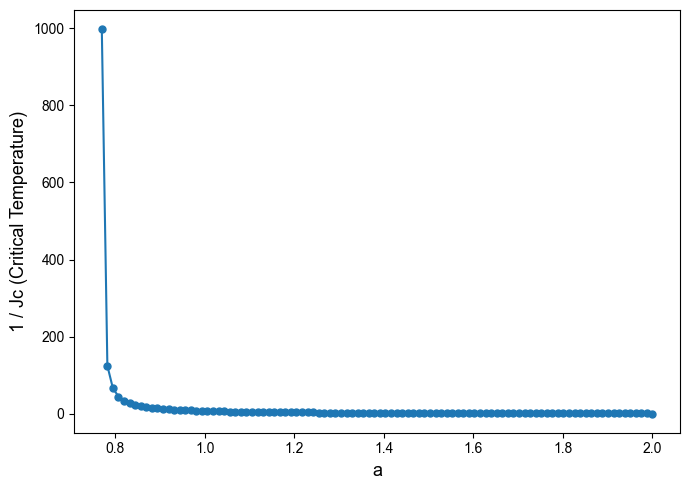

In [12]:
a_vals = np.linspace(.77, 2, 100)
Jc_vals = []
Tc_vals = []

for a in a_vals:
    Jc = find_Jc(
        a=a,
        Jlow=1e-3, Jhigh=1e2,
        max_steps=6, max_dist_final=6,
        tol=1e-5,
        growth_threshold=1e4, decay_threshold=1e-4
    )
    Jc_vals.append(Jc)
    Tc_vals.append(1.0 / Jc)
    print(f"a = {a:.4f}  →  Jc = {Jc:.3}, Tc = {1/Jc:.3}")

Jc_vals = np.array(Jc_vals)
Tc_vals = np.array(Tc_vals)

# ----- plot -----
plt.figure(figsize=(7,5))
plt.plot(a_vals, Tc_vals, 'o-', ms=5)
plt.xlabel("a", fontsize=13)
plt.ylabel("1 / Jc (Critical Temperature)", fontsize=13)
plt.grid(False)
plt.tight_layout()
plt.show()

# Fixed point

In [8]:
a = 1
tolerance = 1e-5

Jc = find_Jc(
    a=a,
    Jlow=1e-2, Jhigh=1e2,
    max_steps=6, max_dist_final=5,
    tol=tolerance,
    growth_threshold=1e4, decay_threshold=1e-4
)
print("Critical J =", Jc)

J0 = build_initial_guess(Jc, a=a, D=200)

J_star, info = newton_rg_lstsq(J0, verbose=True)
print("Fixed point J*:\n", J_star)

Critical J = 0.12799049526453016
[lstsq] iter 0: D=200, D1=66, ||J'-J||=1.960e-02
[lstsq] iter 1: D=200, D1=66, ||J'-J||=1.367e-02
[lstsq] iter 2: D=200, D1=66, ||J'-J||=8.602e-03
[lstsq] iter 3: D=200, D1=66, ||J'-J||=5.268e-03
[lstsq] iter 4: D=200, D1=66, ||J'-J||=1.874e-03
[lstsq] iter 5: D=200, D1=66, ||J'-J||=3.904e-04
[lstsq] iter 6: D=200, D1=66, ||J'-J||=1.304e-04
[lstsq] iter 7: D=200, D1=66, ||J'-J||=5.472e-05
[lstsq] iter 8: D=200, D1=66, ||J'-J||=2.147e-05
[lstsq] iter 9: D=200, D1=66, ||J'-J||=7.297e-06
Fixed point J*:
 [0.         0.12242913 0.05533485 0.03232251 0.02482908 0.022188
 0.02103317 0.01699398 0.01350825 0.01072418 0.00987416 0.00938945
 0.0089723  0.00849432 0.00820056 0.00792457 0.00782142 0.00787141
 0.00788337 0.0072592  0.00662165 0.00606923 0.00566228 0.00525101
 0.00488706 0.00450457 0.00409968 0.0037425  0.00367203 0.00363021
 0.00357539 0.00350288 0.00344999 0.00338925 0.00333532 0.00329874
 0.00325412 0.00318257 0.00312    0.00305597 0.00302074 0.00

In [9]:
err = check_fixed_point(J_star, tol=tolerance)

Fixed-point error norm = 2.456e-06
✔ Fixed point verified.


# Thermal exponent yT

In [34]:
a = .98
N = 1000

Jc = find_Jc(
    a=a,
    Jlow=1e-2, Jhigh=1e2,
    max_steps=6, max_dist_final=5,
    tol=1e-5, growth_threshold=1e4, decay_threshold=1e-4
)
J0 = build_initial_guess(Jc, a=a, D=N)
J_star, info = newton_rg_lstsq(J0, verbose=False)

T, J_head = recursion_matrix_at_fixed_point(J_star, N)
y_T, lambda_T, eigs = thermal_exponent_from_T(T, b=3.0)

print("Largest relevant eigenvalue λ_T:", lambda_T)
print("Thermal scaling exponent y_T:", y_T)
print("Correlation length exponent ν ≈ 1/y_T:", 1.0/y_T)

Largest relevant eigenvalue λ_T: (1.0442915858807107+0j)
Thermal scaling exponent y_T: 0.0394486278116333
Correlation length exponent ν ≈ 1/y_T: 25.34942418719828


In [30]:
eigvals = np.linalg.eigvals(T)
sorted(eigvals, key=lambda z: abs(z), reverse=True)

[np.complex128(0.9192612128050655+0j),
 np.complex128(0.2816243583784812+0.5832769306273999j),
 np.complex128(0.2816243583784812-0.5832769306273999j),
 np.complex128(-0.28685238540515234+0.4504715919158681j),
 np.complex128(-0.28685238540515234-0.4504715919158681j),
 np.complex128(-0.49241816019438156+0j),
 np.complex128(-0.07132686766022356+0j),
 np.complex128(-0.036776474800989715+0.05539590197778245j),
 np.complex128(-0.036776474800989715-0.05539590197778245j),
 np.complex128(0.030915640573921106+0.05300511017368809j),
 np.complex128(0.030915640573921106-0.05300511017368809j),
 np.complex128(0.05346509533244396+0j),
 np.complex128(-0.005125709040049381+0j),
 np.complex128(-5.0542586480917926e-05+4.7849369529639414e-05j),
 np.complex128(-5.0542586480917926e-05-4.7849369529639414e-05j),
 np.complex128(4.2659492944909175e-05+4.824793552894552e-05j),
 np.complex128(4.2659492944909175e-05-4.824793552894552e-05j),
 np.complex128(3.578586133550879e-05+1.973423753278621e-05j),
 np.complex12

## Stability of yT with N

In [ ]:
# ----- parameters -----
b = 3.0
N_min = 20
N_max = len(J_star) - 1    # maximum allowed head size

Ns = []
lambda_Ts = []
yTs = []

# ----- main sweep -----
for N in range(N_min, N_max + 1, 20):
    T, J_head = recursion_matrix_at_fixed_point(J_star, N)
    y_T, lambda_T, eigs = thermal_exponent_from_T(T, b)

    
    Ns.append(N)
    lambda_Ts.append(lambda_T.real)
    yTs.append(y_T.real)

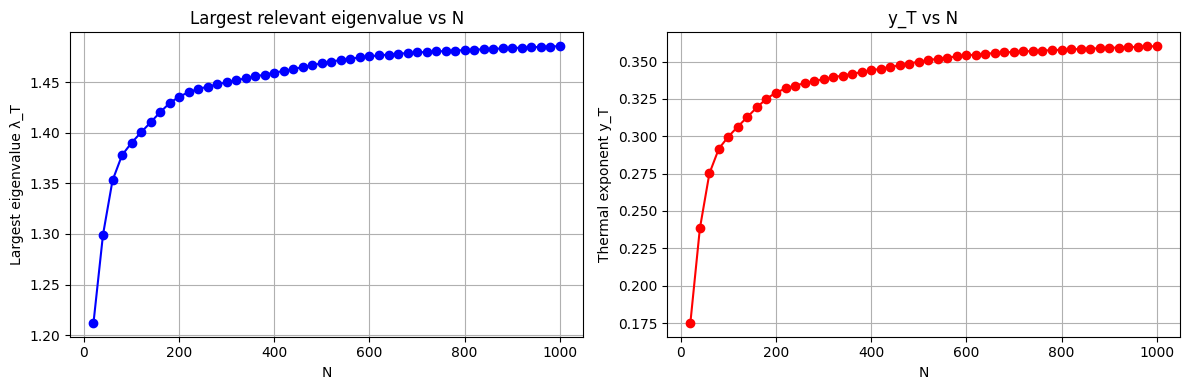

In [27]:
# ----- plots -----
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(Ns, lambda_Ts, 'b-o')
ax[0].set_xlabel("N")
ax[0].set_ylabel("Largest eigenvalue λ_T")
ax[0].set_title("Largest relevant eigenvalue vs N")
ax[0].grid()

ax[1].plot(Ns, yTs, 'r-o')
ax[1].set_xlabel("N")
ax[1].set_ylabel("Thermal exponent y_T")
ax[1].set_title("y_T vs N")
ax[1].grid()

plt.tight_layout()
plt.savefig("../figures/yT_stability.png")
plt.show()

# Magnetization

## Single a

In [35]:
a = 1
tolerance = 1e-5

Jc = find_Jc(
    a=a,
    Jlow=1e-2, Jhigh=1e2,
    max_steps=6, max_dist_final=5,
    tol=tolerance,
    growth_threshold=1e4, decay_threshold=1e-4
)
print("Critical J =", Jc)

J0 = build_initial_guess(Jc, a=a, D=200)
J_star, info = newton_rg_lstsq(J0, verbose=True)
print("Fixed point J*:\n", J_star)
err = check_fixed_point(J_star, tol=tolerance)
print()
yH, alphaH = magnetic_exponent_yH(J_star, eps=1e-8, b=3.0)
print("dH'/dH at fixed point =", alphaH)
print("y_H =", yH)

Critical J = 0.12799049526453016
[lstsq] iter 0: D=200, D1=66, ||J'-J||=1.960e-02
[lstsq] iter 1: D=200, D1=66, ||J'-J||=1.367e-02
[lstsq] iter 2: D=200, D1=66, ||J'-J||=8.602e-03
[lstsq] iter 3: D=200, D1=66, ||J'-J||=5.268e-03
[lstsq] iter 4: D=200, D1=66, ||J'-J||=1.874e-03
[lstsq] iter 5: D=200, D1=66, ||J'-J||=3.904e-04
[lstsq] iter 6: D=200, D1=66, ||J'-J||=1.304e-04
[lstsq] iter 7: D=200, D1=66, ||J'-J||=5.472e-05
[lstsq] iter 8: D=200, D1=66, ||J'-J||=2.147e-05
[lstsq] iter 9: D=200, D1=66, ||J'-J||=7.297e-06
Fixed point J*:
 [0.         0.12242913 0.05533485 0.03232251 0.02482908 0.022188
 0.02103317 0.01699398 0.01350825 0.01072418 0.00987416 0.00938945
 0.0089723  0.00849432 0.00820056 0.00792457 0.00782142 0.00787141
 0.00788337 0.0072592  0.00662165 0.00606923 0.00566228 0.00525101
 0.00488706 0.00450457 0.00409968 0.0037425  0.00367203 0.00363021
 0.00357539 0.00350288 0.00344999 0.00338925 0.00333532 0.00329874
 0.00325412 0.00318257 0.00312    0.00305597 0.00302074 0.00

In [36]:
J = Jc+.001
M = magnetization(J, a, Jc, max_dist_final=5, max_steps=10)
print("M =", M)

M = 0.004578677665505217


Jc = 0.4238417166098952


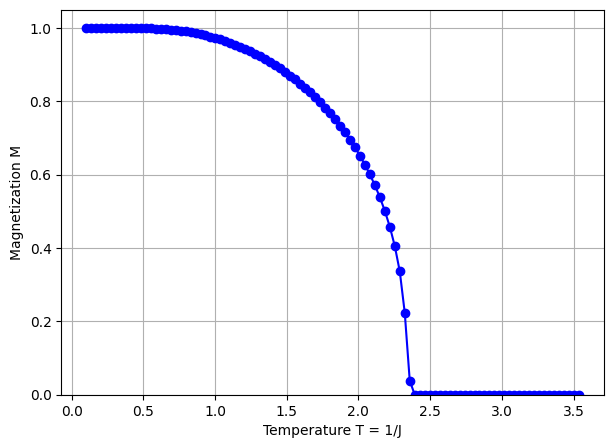

In [51]:
# Parameters
a = 1.5
Jc = find_Jc(
    a=a,
    Jlow=1e-2, Jhigh=1e2,
    max_steps=8, max_dist_final=6,
    tol=1e-6, growth_threshold=1e4, decay_threshold=1e-4
)

print(f"Jc = {Jc}")
T_values = np.linspace(0.1, 1.5/Jc, 100)
J_values = 1.0 / T_values

M_values = [magnetization(J0, a, Jc,
                          max_dist_final=6,
                          max_steps=12,
                          eps=1e-8) for J0 in J_values]

plt.figure(figsize=(7, 5))
plt.plot(T_values, M_values, 'b-o')
plt.xlabel("Temperature T = 1/J")
plt.ylabel("Magnetization M")
plt.ylim(0, 1.05)
plt.grid(True)
plt.show()

## Multiple a's

Processing a = 0.0
Processing a = 0.2
Processing a = 0.4
Processing a = 0.6


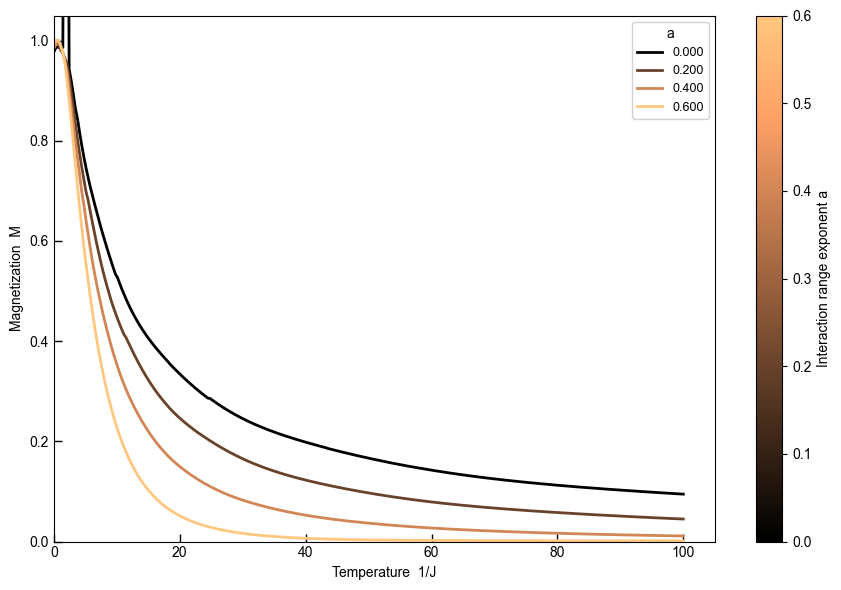

In [118]:
from matplotlib import cm

a_values = np.array([0.0 , 0.2, 0.4, 0.6])
data_by_a = []

for a in a_values:
    print(f"Processing a = {a}")

    if a < 0.8:
        Jc = 1e-10
        T_arr = np.linspace(0.10, 100, 300)
        J_arr = 1.0 / T_arr
    else:
        Jc = find_Jc(
            a=a,
            Jlow=1e-2, Jhigh=1e2,
            max_steps=10,
            max_dist_final=6,
            tol=1e-6,
            growth_threshold=1e4,
            decay_threshold=1e-4
        )
        T_arr = np.linspace(0.10, 1.1 / Jc, 100)
        J_arr = 1.0 / T_arr


    M_arr = []
    for J0 in J_arr:
        T = 1/J0
        if T < 0.8: max_k = 8
        else: max_k = 10
        M_arr.append(magnetization(J0, a, Jc, max_dist_final=6, max_steps=max_k, eps=1e-8))    
    M_arr = np.array(M_arr)

    data_by_a.append(list(zip(T_arr, M_arr)))

# Plot
fig, ax = plt.subplots(figsize=(9, 6))
cmap = cm.copper
norm = plt.Normalize(a_values.min(), a_values.max())

for a, tuples_a in zip(a_values, data_by_a):
    T_arr = np.array([x[0] for x in tuples_a])
    M_arr = np.array([x[1] for x in tuples_a])
    ax.plot(T_arr, M_arr, label=f"{a:.3f}", color=cmap(norm(a)), linewidth=2)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sm, ax=ax, label='Interaction range exponent a')
ax.set_xlabel('Temperature  1/J')
ax.set_ylabel('Magnetization  M')
ax.set_xlim(0, None)
ax.set_ylim(0, 1.05)
ax.legend(title='a', loc='upper right', fontsize=9, framealpha=.9)
ax.tick_params(axis='both', which='major', direction='in', width=1, length=6)
plt.tight_layout()
plt.show()

In [ ]:
from matplotlib import cm

a_values = np.array([0.0 , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 1.9, 2.0 ])
data_by_a = []

for a in a_values:
    print(f"Processing a = {a}")

    Jc = find_Jc(
        a=a,
        Jlow=1e-5, Jhigh=1e2,
        max_steps=10,
        max_dist_final=6,
        tol=1e-6,
        growth_threshold=1e4,
        decay_threshold=1e-4
    )

    T_arr = np.linspace(0.10, 1.5 / Jc, 300)
    J_arr = 1.0 / T_arr

    M_arr = np.array([
        magnetization(J0, a, Jc, max_dist_final=6, max_steps=10, eps=1e-8)
        for J0 in J_arr
    ])

    data_by_a.append(list(zip(T_arr, M_arr)))

# Plot
fig, ax = plt.subplots(figsize=(9, 6))
cmap = cm.copper
norm = plt.Normalize(a_values.min(), a_values.max())

for a, tuples_a in zip(a_values, data_by_a):
    T_arr = np.array([x[0] for x in tuples_a])
    M_arr = np.array([x[1] for x in tuples_a])
    ax.plot(T_arr, M_arr, label=f"{a:.3f}", color=cmap(norm(a)), linewidth=2)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sm, ax=ax, label='Interaction range exponent a')
ax.set_xlabel('Temperature  1/J')
ax.set_ylabel('Magnetization  M')
ax.set_xlim(0, 100)
ax.set_ylim(0, 1.05)
ax.legend(title='a', loc='upper right', fontsize=9, framealpha=.9)
ax.tick_params(axis='both', which='major', direction='in', width=1, length=6)
plt.tight_layout()
plt.show()

## Save data

In [86]:
# Save data for each a to its own file
for a, tuples_a in zip(a_values, data_by_a):
    T_arr = np.array([x[0] for x in tuples_a])
    M_arr = np.array([x[1] for x in tuples_a])
    out = np.column_stack((T_arr, M_arr))

    filename = f"../data/magnetization/magnetization_a_{a:.3f}.txt"
    np.savetxt(
        filename, out,
        header="T\tM",
        fmt="%.12e",
        comments=""
    )
    print("Saved:", filename)

Saved: ../data/magnetization/magnetization_a_0.000.txt
Saved: ../data/magnetization/magnetization_a_0.200.txt
Saved: ../data/magnetization/magnetization_a_0.400.txt
Saved: ../data/magnetization/magnetization_a_0.600.txt
Saved: ../data/magnetization/magnetization_a_0.800.txt
Saved: ../data/magnetization/magnetization_a_1.000.txt
Saved: ../data/magnetization/magnetization_a_1.200.txt
Saved: ../data/magnetization/magnetization_a_1.400.txt
Saved: ../data/magnetization/magnetization_a_1.600.txt
Saved: ../data/magnetization/magnetization_a_1.800.txt
Saved: ../data/magnetization/magnetization_a_1.900.txt
Saved: ../data/magnetization/magnetization_a_2.000.txt


## Load data

In [10]:
# Load data for each a from its own file
import numpy as np

# a-values used originally
a_values = np.array([0.0 , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 1.9, 2.0])

data_by_a = []

for a in a_values:
    filename = f"../data/magnetization/magnetization_a_{a:.3f}.txt"
    print("Loading:", filename)

    # If file has a header "T M", skiprows=1 handles it.
    arr = np.loadtxt(filename, skiprows=1)

    T_arr = arr[:, 0]
    M_arr = arr[:, 1]

    data_by_a.append(list(zip(T_arr, M_arr)))

Loading: ../data/magnetization/magnetization_a_0.000.txt
Loading: ../data/magnetization/magnetization_a_0.200.txt
Loading: ../data/magnetization/magnetization_a_0.400.txt
Loading: ../data/magnetization/magnetization_a_0.600.txt
Loading: ../data/magnetization/magnetization_a_0.800.txt
Loading: ../data/magnetization/magnetization_a_1.000.txt
Loading: ../data/magnetization/magnetization_a_1.200.txt
Loading: ../data/magnetization/magnetization_a_1.400.txt
Loading: ../data/magnetization/magnetization_a_1.600.txt
Loading: ../data/magnetization/magnetization_a_1.800.txt
Loading: ../data/magnetization/magnetization_a_1.900.txt
Loading: ../data/magnetization/magnetization_a_2.000.txt


/var/folders/p_/j__hv0j95yv8xknt5_nvt4pw0000gn/T/ipykernel_69814/1581770836.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


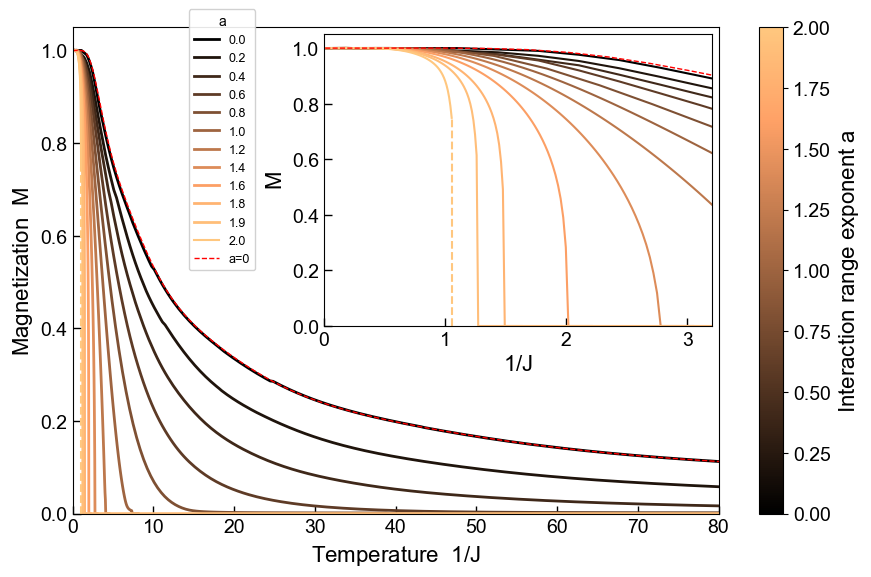

In [16]:
from matplotlib import cm

plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'Arial'
plt.rcParams.update({'mathtext.default': 'regular'})

fig, ax = plt.subplots(figsize=(9, 6))
cmap = cm.copper
norm = plt.Normalize(a_values.min(), a_values.max())

# Main plot
for a, tuples_a in zip(a_values, data_by_a):
    T_arr = np.array([x[0] for x in tuples_a])
    M_arr = np.array([x[1] for x in tuples_a])
    if a != max(a_values):
        ax.plot(T_arr, M_arr, label=f"{a:.1f}", color=cmap(norm(a)), linewidth=2)
    else:
        i = np.where(T_arr==1.054473426129e+00)[0][0]
        ax.plot(T_arr[:i+1], M_arr[:i+1], marker='', label=f'{a:.1f}', color=cmap(norm(a)), linewidth=1.5)
        ax.plot([T_arr[i], T_arr[i]], [0, M_arr[i]], linestyle='--', color=cmap(norm(a)), linewidth=1.5)


# Colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Interaction range exponent $a$', fontsize=16)
cbar.ax.tick_params(labelsize=14) 

ax.set_xlabel('Temperature  $1/J$', fontsize=16)
ax.set_ylabel('Magnetization  $M$', fontsize=16)
ax.set_xlim(0, 80)
ax.set_ylim(0, 1.05)
ax.legend(title='a', loc=(0.18, 0.5), fontsize=9, framealpha=.9)
ax.tick_params(axis='both', which='major', direction='in', labelsize=14, width=1, length=6)

# --- Inset axis (upper right) ---
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

inset = inset_axes(ax, width="60%", height="60%", loc="upper right")

# Plot into inset
for a, tuples_a in zip(a_values, data_by_a):
    T_arr = np.array([x[0] for x in tuples_a])
    M_arr = np.array([x[1] for x in tuples_a])
    if a != max(a_values):
        inset.plot(T_arr, M_arr, color=cmap(norm(a)), linewidth=1.5)
    else:
        #i = np.where(T_arr==1.054473426129e+00)[0][0]
        inset.plot(T_arr[:i+1], M_arr[:i+1], marker='', label=f'{a:.2f}', color=cmap(norm(a)), linewidth=1.5)
        inset.plot([T_arr[i], T_arr[i]], [0, M_arr[i]], linestyle='--', color=cmap(norm(a)), linewidth=1.5)

# Set x-axis limits for zoom
inset.set_xlabel('$1/J$', fontsize=16)
inset.set_ylabel('$M$', fontsize=16)
inset.set_xlim(0, 3.2)
inset.set_ylim(0, 1.05)
inset.tick_params(axis='both', which='major', direction='in', labelsize=14, width=1, length=6)

plt.tight_layout()
plt.savefig("magnetization.png")
plt.show()

# Critical exponents

In [7]:
result = compute_exponents_over_a(
    a_min=1, a_max=2.0,
    num_points=10,
    D_init=300, N_matrix=300,
    d_dim=1.0, b=3.0
)

a = result["a"]
exps = [
    ("yT",     result["yT"]),
    ("yH",     result["yH"]),
    ("β",      result["beta"]),
    ("δ",      result["delta"]),
    ("η",      result["eta"]),
    ("ν",      result["nu"]),
    ("α",      result["alpha"]),
    ("γ",      result["gamma"]),
]


=== Computing exponents at a = 1.0000 ===
  yT = 0.012026417701829155
  yH = 0.5011500539195503
  ν=83.1503, β=41.4795, δ=1.0046, η=1.9977, α=-81.1503, γ=0.1913

=== Computing exponents at a = 1.1111 ===
  yT = 0.12947720591621606
  yH = 0.56009229680233
  ν=7.7234, β=3.3976, δ=1.2732, η=1.8798, α=-5.7234, γ=0.9282

=== Computing exponents at a = 1.2222 ===
  yT = 0.21598853873113094
  yH = 0.6162363554132185
  ν=4.6299, β=1.7768, δ=1.6058, η=1.7675, α=-2.6299, γ=1.0763

=== Computing exponents at a = 1.3333 ===
  yT = 0.28183015220298435
  yH = 0.6694767775484318
  ν=3.5482, β=1.1728, δ=2.0255, η=1.6610, α=-1.5482, γ=1.2027

=== Computing exponents at a = 1.4444 ===
  yT = 0.3312390920538422
  yH = 0.719677879716543
  ν=3.0190, β=0.8463, δ=2.5673, η=1.5606, α=-1.0190, γ=1.3264

=== Computing exponents at a = 1.5556 ===
  yT = 0.3661678425440614
  yH = 0.7666789749547216
  ν=2.7310, β=0.6372, δ=3.2859, η=1.4666, α=-0.7310, γ=1.4566

=== Computing exponents at a = 1.6667 ===
  yT = 0.3

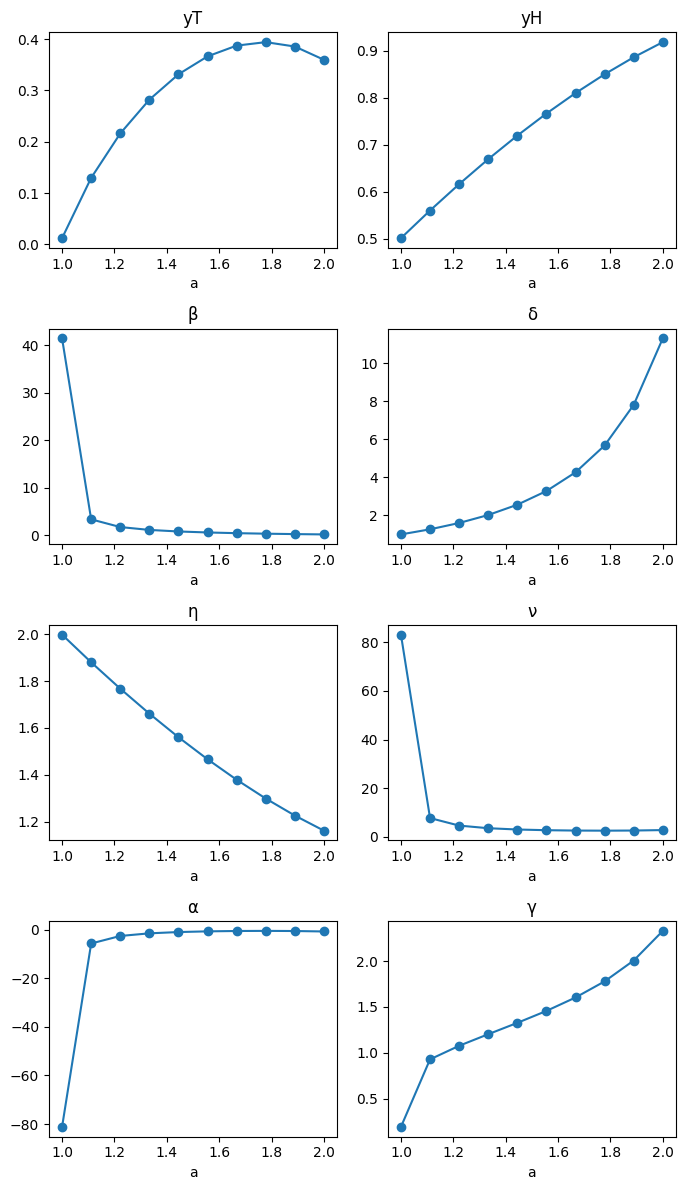

In [8]:
fig, axes = plt.subplots(4, 2, figsize=(7, 12))
axes = axes.flatten()

for i, (name, vals) in enumerate(exps):
    ax = axes[i]
    ax.plot(a, vals, marker="o")
    ax.set_title(name)
    ax.set_xlabel("a")
    ax.grid(False)
plt.tight_layout()
#plt.savefig("../figures/exponents_new.png")
plt.show()

# Energy density

In [2]:
@njit(cache=True)
def compute_Gprime_H0(J):
    """
    H = 0 case: additive constant G' for a pair of neighbouring 3-spin blocks.

    Using:
        G' = 1/2 [ ln R(++) + ln R(+-) ]
           = 1/2 ln( R(++) * R(+-) )

    where R(++) and R(+-) are partial partition sums for majority (+,+) and (+,-)
    blocks, built with *full-length* couplings J.
    """
    D = len(J) - 1  # max distance

    # Intracell energies for + and - majority blocks
    E_plus  = intracell_energies(plus_configs,  J)
    E_minus = intracell_energies(minus_configs, J)

    # Geometry: left block at positions 0,1,2; right block at 3,4,5
    left_pos  = np.array([0, 1, 2], dtype=np.int64)
    right_pos = np.array([3, 4, 5], dtype=np.int64)

    # Distances between spins in left and right blocks
    distances = np.empty((3, 3), dtype=np.int64)
    for a in range(3):
        for b in range(3):
            distances[a, b] = abs(right_pos[b] - left_pos[a])

    n_plus  = plus_configs.shape[0]   # 4
    n_minus = minus_configs.shape[0]  # 4

    # ---------- R(++) ----------
    n_pp = n_plus * n_plus
    totals_pp = np.empty(n_pp, dtype=np.float64)
    idx = 0
    for iL in range(n_plus):
        sL = plus_configs[iL]
        EL = E_plus[iL]
        for iR in range(n_plus):
            sR = plus_configs[iR]
            ER = E_plus[iR]
            E_int = 0.0
            for aa in range(3):
                for bb in range(3):
                    d = distances[aa, bb]
                    if d <= D:
                        E_int += J[d] * sL[aa] * sR[bb]
            totals_pp[idx] = EL + ER + E_int
            idx += 1
    log_R_pp = logsumexp(totals_pp)

    # ---------- R(+-) ----------
    n_pm = n_plus * n_minus
    totals_pm = np.empty(n_pm, dtype=np.float64)
    idx = 0
    for iL in range(n_plus):
        sL = plus_configs[iL]
        EL = E_plus[iL]
        for iR in range(n_minus):
            sR = minus_configs[iR]
            ER = E_minus[iR]
            E_int = 0.0
            for aa in range(3):
                for bb in range(3):
                    d = distances[aa, bb]
                    if d <= D:
                        E_int += J[d] * sL[aa] * sR[bb]
            totals_pm[idx] = EL + ER + E_int
            idx += 1
    log_R_pm = logsumexp(totals_pm)

    # H = 0 → spin-flip symmetry:
    # G' = 1/2 [ln R(++) + ln R(+-)]
    Gp = 0.5 * (log_R_pp + log_R_pm)
    return Gp

In [59]:
from numba import njit
import numpy as np

@njit(cache=True)
def recursion_matrix_head_from_full_density(J_full, D_head, eps):
    """
    Build the density recursion matrix R for one RG step from the current long J_full.

    We define the field vector (head) as:
        E = [G, J_1, J_2, ..., J_D_head]

    Next step:
        G'      = compute_Gprime_H0(J_full)
        J_full' = rg_step(J_full)
        J'_i    = J_full'[i] for i=1..D_head (if available, else 0)

    Forward Jacobian F is:
        F[i,j] = ∂E'_i / ∂E_j   (i,j = 0..D_head)
      where:
        i=0: G',  i>=1: J'_i
        j=0: G,   j>=1: J_j

    For densities (row vectors) the recursion matrix is:
        R = F^T

    We return:
        R  : the (1+D_head) x (1+D_head) density recursion matrix
        Jp_full : the next long-range coupling vector after one RG step.
    """
    # Baseline G' and J'_full
    G0 = compute_Gprime_H0(J_full)
    Jp_full0 = rg_step(J_full)

    # Forward Jacobian F
    F = np.zeros((1 + D_head, 1 + D_head), dtype=np.float64)

    # F[0,0] = ∂G'/∂G = b^d = 3 in 1D with b=3
    F[0, 0] = 3.0

    # Derivatives w.r.t J_1..J_D_head
    D_full = len(J_full) - 1
    D_full_next = len(Jp_full0) - 1

    # For i>=1 we only define J'_i up to min(D_head, D_full_next)
    max_i = D_head
    if D_full_next < D_head:
        max_i = D_full_next

    for j in range(1, D_head + 1):
        if j > D_full:
            # J_full has no such distance; derivative is effectively 0
            continue

        # Perturb J_full at index j
        J_pert = J_full.copy()
        J_pert[j] += eps

        Gp_pert = compute_Gprime_H0(J_pert)
        Jp_full_pert = rg_step(J_pert)

        # ∂G'/∂J_j
        F[0, j] = (Gp_pert - G0) / eps

        # ∂J'_i / ∂J_j for i=1..max_i
        D_full_next_pert = len(Jp_full_pert) - 1
        local_max_i = max_i
        if D_full_next_pert < local_max_i:
            local_max_i = D_full_next_pert

        for i in range(1, local_max_i + 1):
            F[i, j] = (Jp_full_pert[i] - Jp_full0[i]) / eps

        # For i > local_max_i, F[i,j] stays 0

    # Density recursion matrix R = F^T
    R = F.T.copy()

    return R, Jp_full0

def compute_u_head(J0, a, Jc,
                   max_dist_final=5,
                   n_steps=8,
                   eps=1e-6):
    """
    Compute the head densities u_r = <s_i s_{i+r}> at the bare scale (H=0),
    for r = 1..max_dist_final, using PRE-style density recursion.

    Parameters
    ----------
    J0 : float
        Bare nearest-neighbour coupling, J0 = 1/T.
    a : float
        Long-range exponent in J_r = J0 / r^a.
    Jc : float
        Critical coupling for this 'a' (from find_Jc).
    max_dist_final : int
        Head size D: we compute densities u_r for r=1..D.
    n_steps : int
        Number of RG steps for density recursion.
    eps : float
        Finite-difference step for recursion matrix entries.

    Returns
    -------
    u_bare : ndarray, shape (max_dist_final,)
        Densities u_r at the bare scale.
    """

    D_head = max_dist_final

    # Choose long initial cutoff so that after n_steps we still have >= D_head couplings
    D_full0 = required_initial_max_distance(D_head, n_steps)

    # Build the initial long-range coupling vector J_full
    J_full = np.zeros(D_full0 + 1, dtype=np.float64)
    r = np.arange(1, D_full0 + 1, dtype=np.float64)
    J_full[1:] = J0 / (r**a)

    # Collect density recursion matrices R_list
    R_list = []
    for _ in range(n_steps):
        Rk, J_full_next = recursion_matrix_head_from_full_density(
            J_full, D_head, eps
        )
        R_list.append(Rk)
        J_full = J_full_next
        # If the full vector shrank too much, we could break, but
        # required_initial_max_distance should prevent that.

    # Decide sink (ordered vs disordered) from bare J0 and Jc
    if J0 > Jc:
        # Ferromagnetic sink: all pair correlations = 1 at the sink
        M_sink = np.ones(1 + D_head, dtype=np.float64)
    else:
        # Paramagnetic sink: zero correlations, but conjugate to G is 1
        M_sink = np.zeros(1 + D_head, dtype=np.float64)
        M_sink[0] = 1.0

    # Build cumulative matrix U = prod_k [ b^(-d) * R^(k) ] from the LEFT
    N = 1 + D_head
    U = np.eye(N, dtype=np.float64)

    b = 3.0
    d_dim = 1.0
    factor = b**(-d_dim)

    for Rk in R_list:
        U = factor * (Rk @ U)

    # Bare-scale densities: M_bare = M_sink @ U
    M_bare = M_sink @ U

    # u_r are the components conjugate to J_r, i.e. entries 1..D_head
    u_bare = M_bare[1:1 + D_head].copy()
    return u_bare, R_list, U



## Densities at a single temperature

In [97]:
# Example usage: single T, single a
a = 1.5
max_dist_final = 3**3
n_steps = 8

# Find critical coupling
Jc = find_Jc(a=a,
             Jlow=1e-3, Jhigh=1e2,
             max_steps=8, max_dist_final=6,
             tol=1e-6)

T = 0.8
J0 = 1.0 / T

u, _, _ = compute_u_head(J0, a, Jc,
                   max_dist_final=max_dist_final,
                   n_steps=n_steps,
                   eps=1e-6)

print(f"a = {a}, T = {T}, J0 = {J0}; Tc = {1/Jc:.3}\n")
for r_idx, ur in enumerate(u, start=1):
    print(f"u_{r_idx}(T) = <s_i s_i+{r_idx}> = {ur}")


a = 1.5, T = 0.8, J0 = 1.25; Tc = 2.36

u_1(T) = <s_i s_i+1> = 0.05591059411468779
u_2(T) = <s_i s_i+2> = 0.008417493656050053
u_3(T) = <s_i s_i+3> = 0.004298466469953046
u_4(T) = <s_i s_i+4> = 0.0027387762480223475
u_5(T) = <s_i s_i+5> = 0.0019438114189101298
u_6(T) = <s_i s_i+6> = 0.0014724113466986727
u_7(T) = <s_i s_i+7> = 0.0011655115183734515
u_8(T) = <s_i s_i+8> = 0.0009524243391698284
u_9(T) = <s_i s_i+9> = 0.000773445973154735
u_10(T) = <s_i s_i+10> = 0.0006143910899428038
u_11(T) = <s_i s_i+11> = 0.0005322402869572791
u_12(T) = <s_i s_i+12> = 0.0004669144076462908
u_13(T) = <s_i s_i+13> = 0.0004139508694767126
u_14(T) = <s_i s_i+14> = 0.00037030277998857707
u_15(T) = <s_i s_i+15> = 0.0003338257789178954
u_16(T) = <s_i s_i+16> = 0.0003029712621984203
u_17(T) = <s_i s_i+17> = 0.00027659590535660065
u_18(T) = <s_i s_i+18> = 0.0002538390003511441
u_19(T) = <s_i s_i+19> = 0.00023404142536043304
u_20(T) = <s_i s_i+20> = 0.0002166908780729735
u_21(T) = <s_i s_i+21> = 0.0002013837886

## Densities as a function of T

In [ ]:
import matplotlib.pyplot as plt

a = 1.5
max_dist_final = 3**4
n_steps = 8

Jc = find_Jc(a=a,
             Jlow=1e-3, Jhigh=1e2,
             max_steps=8, max_dist_final=6,
             tol=1e-6)
print(f"Tc = {1/Jc:.3}")

T_values = np.linspace(0.1, 5.0, 100)
u_all = []

for T in T_values:
    J0 = 1.0 / T
    u, _, _ = compute_u_head(J0, a, Jc,
                       max_dist_final=max_dist_final,
                       n_steps=n_steps,
                       eps=1e-6)
    u_all.append(u)

u_all = np.array(u_all)   # shape (n_T, max_dist_final)

plt.figure(figsize=(7, 5))
for r_idx in range(1, 5):
    plt.plot(T_values, u_all[:, r_idx], '-', markersize=3, label=f"r={r_idx+1}")
plt.axvline(x=1/Jc, linestyle='--', linewidth=1, color='k')
plt.xlabel("T = 1/J")
plt.ylabel(r"$u_r(T) = \langle s_i s_{i+r} \rangle$")
plt.legend()
plt.xlim(0, None)
plt.ylim(0, None)
plt.grid(False)
plt.tight_layout()
#plt.savefig("../figures/densities")
plt.show()

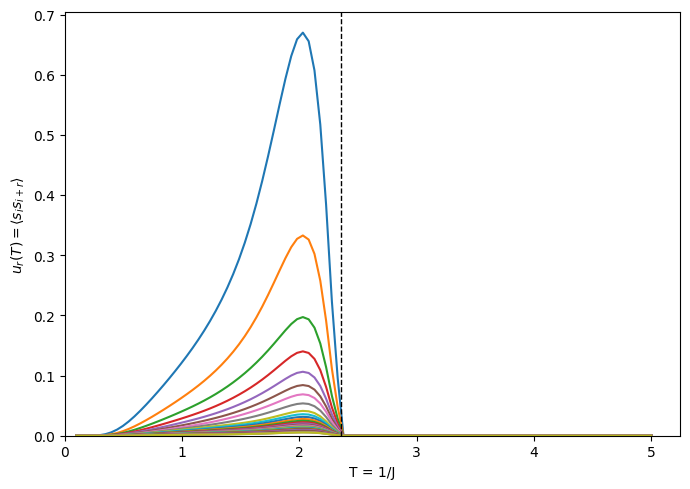

In [83]:
plt.figure(figsize=(7,5))
for r_idx in range(1, 30):
    plt.plot(T_values, u_all[:, r_idx], '-', markersize=3, label=f"r={r_idx+1}")

plt.axvline(x=1/Jc, linestyle='--', linewidth=1, color='k')
plt.xlabel("T = 1/J")
plt.ylabel(r"$u_r(T) = \langle s_i s_{i+r} \rangle$")
#plt.legend()
plt.xlim(0, None)
plt.ylim(0, None)
plt.grid(False)
plt.tight_layout()
#plt.savefig("../figures/densities")
plt.show()

## Left eigenvector check

In [91]:
a = 1.5
max_dist_final = 3**4
n_steps = 8

# Find critical coupling
#Jc = find_Jc(a=a,
#         Jlow=1e-3, Jhigh=1e2,
#         max_steps=8, max_dist_final=6,
#         tol=1e-6)

T = .1

if T > 1/Jc:
    print(f"T = {T} > Tc = {1/Jc:.3}: Para")
    M_sink = np.zeros(1 + max_dist_final, dtype=np.float64)
    M_sink[0] = 1.0
else:
    print(f"T = {T} < Tc = {1/Jc:.3}: Ferro")
    M_sink = np.ones(1 + max_dist_final, dtype=np.float64)


u, R_list, U = compute_u_head(1.0 / T, a, Jc,
               max_dist_final=max_dist_final,
               n_steps=n_steps,
               eps=1e-6)

# left eigenvectors of U are right eigenvectors of U^T
evals, evecs = np.linalg.eig(U.T)
idx = np.argmin(np.abs(evals - 1.0))
v_left = evecs[:, idx].real

cos_sim = float(np.dot(v_left, M_sink))

print("Eigenvalue near 1:", evals[idx])
print("Cosine similarity between sink and left eigenvector:", cos_sim)
print("\nLeft eigenvector:\n", v_left)
print("\nSink vector:\n", M_sink)

T = 0.1 < Tc = 2.36: Ferro
Eigenvalue near 1: (1+0j)
Cosine similarity between sink and left eigenvector: 1.0

Left eigenvector:
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Sink vector:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Without recursion matrix

In [142]:
from numba import njit
import numpy as np

@njit(cache=True)
def free_energy_from_G(T, a,
                       max_steps=8,
                       max_dist_final=5):
    """
    Compute (dimensionless) free energy density φ(T) = (1/N) ln Z
    at H=0, using only the additive constants G generated by RG.

    Parameters
    ----------
    T : float
        Temperature.
    a : float
        Long-range exponent in J_r = J0 / r^a, with J0 = 1/T.
    max_steps : int
        Number of RG steps to use.
    max_dist_final : int
        Target max distance we want to still be represented at the final step.
        Used only to choose a long enough initial cutoff.

    Returns
    -------
    phi : float
        Approximate free energy per spin φ(T).
    """

    J0 = 1.0 / T

    # Initial cutoff long enough so that after max_steps we still have >= max_dist_final couplings
    D_full0 = required_initial_max_distance(max_dist_final, max_steps)

    # Build initial long-range couplings J_full
    J_full = np.zeros(D_full0 + 1, dtype=np.float64)
    r = np.arange(1, D_full0 + 1, dtype=np.float64)
    J_full[1:] = J0 / (r**a)

    phi = 0.0
    # First step contributes G^(0) / 3^1, then G^(1) / 3^2, etc.
    factor = 1.0 / 3.0

    for k in range(max_steps):
        # Additive constant at this scale
        Gk = compute_Gprime_H0(J_full)

        # Accumulate with the correct geometric factor
        phi += factor * Gk

        # Go to next RG scale
        J_full = rg_step(J_full)

        # Next term gets another factor 1/3
        factor /= 3.0

        # If couplings shrink too much, we can stop early
        if len(J_full) <= 2:   # no nontrivial distances left
            break

    return phi


def internal_energy_from_G(T, a,
                           max_steps=8,
                           max_dist_final=5,
                           dT_rel=1e-3):
    """
    Compute internal energy per spin u(T) using only free energy from G(T),
    via the identity u(T) = T^2 * dφ/dT.

    Parameters
    ----------
    T : float
        Temperature at which u(T) is evaluated.
    a : float
        Long-range exponent.
    max_steps : int
        Number of RG steps to use in free-energy calculation.
    max_dist_final : int
        Target final distance for initial cutoff sizing.
    dT_rel : float
        Relative step for finite difference in T (e.g. 1e-3).

    Returns
    -------
    u : float
        Approximate internal energy per spin at temperature T.
    """

    dT = dT_rel * T
    if dT == 0.0:
        dT = dT_rel

    # Symmetric finite difference for better accuracy
    phi_plus = free_energy_from_G(T + dT, a,
                                  max_steps=max_steps,
                                  max_dist_final=max_dist_final)
    phi_minus = free_energy_from_G(T - dT, a,
                                   max_steps=max_steps,
                                   max_dist_final=max_dist_final)

    dphi_dT = (phi_plus - phi_minus) / (2.0 * dT)

    # Internal energy u(T) = T^2 * dφ/dT
    u = -(T**2) * dphi_dT
    return u


In [143]:
a = 1.5
T = 0.8

D = 3**3
phi_T = free_energy_from_G(T, a,
                           max_steps=8,
                           max_dist_final=D)
u_T = internal_energy_from_G(T, a,
                             max_steps=8,
                             max_dist_final=D)

print(f"a = {a}, T = {T}")
print("Free energy density φ(T) =", phi_T)
print("Internal energy u(T) from G-only =", u_T)


a = 1.5, T = 0.8
Free energy density φ(T) = 5.78928842880282
Internal energy u(T) from G-only = 5.36212778414722


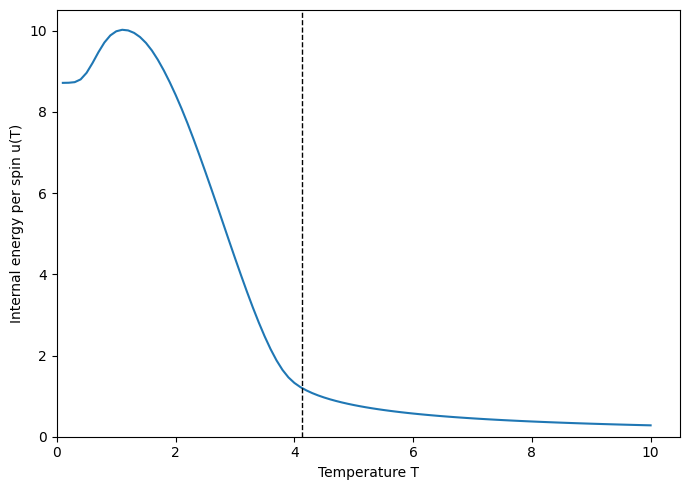

In [137]:
a = 1.2
T_values = np.linspace(0.1, 10.0, 100)

Jc = find_Jc(
    a=a,
    Jlow=1e-3,
    Jhigh=1e2,
    max_steps=8,
    max_dist_final=3**3,
    tol=1e-4
)

u_values = []
for T in T_values:
    u = internal_energy_from_G(T, a,
                               max_steps=8,
                               max_dist_final=3**3,
                               dT_rel=5e-3)
    u_values.append(u)

u_values = np.array(u_values)

plt.figure(figsize=(7,5))
plt.plot(T_values, u_values, '-', markersize=3)
plt.axvline(x=1/Jc, linestyle='--', linewidth=1, color='k')
plt.xlim(0, None)
plt.ylim(0, None)
plt.xlabel("Temperature T")
plt.ylabel("Internal energy per spin u(T)")
plt.tight_layout()
plt.savefig("internal_energy.png")
plt.show()

In [144]:
# ============================================================
# 1. Build arbitrary initial bare J vector
# ============================================================
def build_J_full(J0, a, D_initial):
    J_full = np.zeros(D_initial + 1, dtype=np.float64)
    r = np.arange(1, D_initial + 1)
    J_full[1:] = J0 / (r**a)
    return J_full

# ============================================================
# 2. Free energy from G-only, using arbitrary J_full
# ============================================================
@njit(cache=True)
def free_energy_from_G_bare(J_full_initial,
                            max_steps=8,
                            R_final=5):
    """
    Compute free energy φ = (1/N)ln Z using G-only additive constants.
    """

    J_full = J_full_initial.copy()
    phi = 0.0
    factor = 1.0 / 3.0

    for k in range(max_steps):
        # Additive constant G^k
        Gk = compute_Gprime_H0(J_full)
        phi += factor * Gk

        # RG to next step
        J_full = rg_step(J_full)
        factor /= 3.0

        # stop if long-range vector shrinks too much
        if len(J_full) <= R_final + 1:
            break

    return phi


# ============================================================
# 3. One correlation u_r(T) from G-only: finite difference
# ============================================================
def u_r_from_G(J_full_initial, r, deltaJ,
               max_steps=8, R_final=5):
    """
    Compute u_r = ∂φ/∂J_r via finite difference.
    """

    Jp = J_full_initial.copy()
    Jm = J_full_initial.copy()

    Jp[r] += deltaJ
    Jm[r] -= deltaJ

    phi_p = free_energy_from_G_bare(Jp,
                                    max_steps=max_steps,
                                    R_final=R_final)
    phi_m = free_energy_from_G_bare(Jm,
                                    max_steps=max_steps,
                                    R_final=R_final)

    return (phi_p - phi_m) / (2.0 * deltaJ)



# ============================================================
# 4. Compute u_r(T) for r = 1..Rmax using G-only method
# ============================================================
def compute_u_r_from_G_range(T, a,
                             R_head=5,
                             R_final=10,
                             max_steps=8,
                             deltaJ_rel=1e-3):
    """
    Compute correlations u_r(T) for r = 1..R_head using ONLY G-summing.

    PARAMETERS
    ----------
    T       : temperature
    a       : long-range exponent
    R_head  : distances for which we want u_r (1..R_head)
    R_final : distances guaranteed to exist at final RG step
              must satisfy R_final >= R_head
    max_steps : number of RG decimation steps
    deltaJ_rel : relative perturbation on each J_r

    RETURNS
    -------
    u : array of size R_head
    """

    if R_final < R_head:
        raise ValueError("R_final must be >= R_head")

    # Compute necessary initial length
    D_initial = (3**max_steps) * R_final

    J0 = 1.0 / T
    J_full_0 = build_J_full(J0, a, D_initial)

    deltaJ = deltaJ_rel * J0

    u = np.zeros(R_head)

    for r in range(1, R_head + 1):
        u[r - 1] = u_r_from_G(
            J_full_initial=J_full_0,
            r=r,
            deltaJ=deltaJ,
            max_steps=max_steps,
            R_final=R_final
        )

    return u

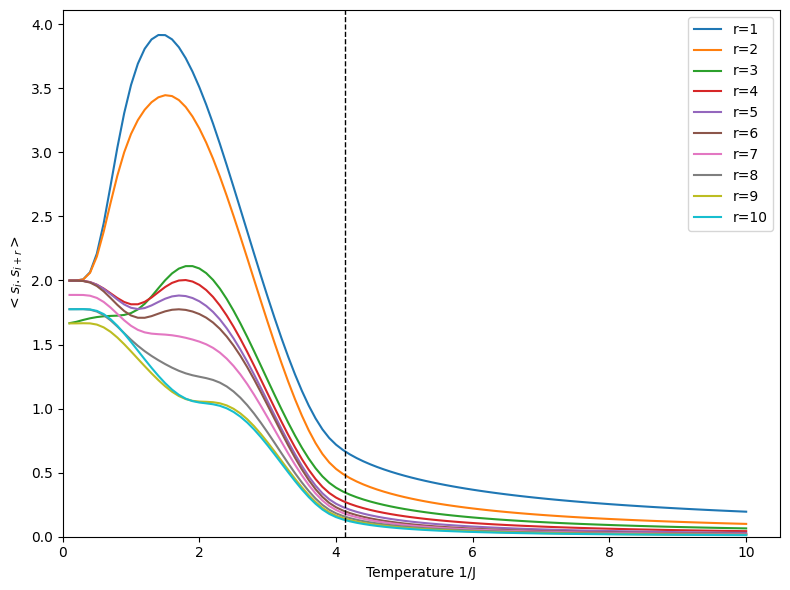

In [140]:
# ============================================================
# 5. Temperature sweep + plotting
# ============================================================
a = 1.2
R_head = 10
R_final = 3**3      # keeps more distances alive → smoother results
T_values = np.linspace(0.1, 10.0, 100)

u_all = np.zeros((len(T_values), R_head))

for i, T in enumerate(T_values):
    #print(f"T = {T:.3f}")
    u_all[i] = compute_u_r_from_G_range(
                    T=T, a=a,
                    R_head=R_head,
                    R_final=R_final,
                    max_steps=8,
                    deltaJ_rel=2e-3
                )

Jc = find_Jc(
    a=a,
    Jlow=1e-3,
    Jhigh=1e2,
    max_steps=8,
    max_dist_final=3**3,
    tol=1e-4
)

plt.figure(figsize=(8,6))
for r in range(1, R_head+1):
    plt.plot(T_values, u_all[:, r-1], '-', markersize=3, label=f"r={r}")
plt.axvline(x=1/Jc, linestyle='--', linewidth=1, color='k')
plt.xlim(0, None)
plt.ylim(0, None)
plt.xlabel("Temperature 1/J")
plt.ylabel(r"$<s_i . s_{i+r}>$")
plt.legend()
plt.tight_layout()
plt.savefig("density.png")
plt.show()